In [1]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet

In [30]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler,MinMaxScaler,RobustScaler
# 데이터 시각화(추세 등) 패키지
import seaborn as sns
# 133 Page
# 데이터 구성:Series, DataFrame
import pandas as pd
# 데이터 시각화
import matplotlib.pyplot as plt
import matplotlib
# export_graphviz: 나무 구조 생성 및 저장 
from sklearn.tree import export_graphviz
# graphviz : 나무 구조 시각화  (.dot 확장자 파일 불러오기 등)
import graphviz
# 데이터 분할:train, test
from sklearn.model_selection import train_test_split
# 예측/회귀 Random Forest
from sklearn.ensemble import RandomForestRegressor
# 최적 모델, 파라미터 탐색
from sklearn.model_selection import GridSearchCV
# 예측/회귀 Gradient Boosting
from sklearn.ensemble import GradientBoostingRegressor

In [31]:
# 선형 회귀분석모델 formula(y ~ X1 + X2 + ...)
import statsmodels.formula.api as smf
# 회귀분석의 정규성 확인
from statsmodels.api import qqplot

In [3]:
matplotlib.rc('font',family='NanumGothic ECO')
matplotlib.rc('axes',unicode_minus=False)

%matplotlib inline

In [121]:
df_raw = pd.read_csv("/home/piai/28기 임채훈/01 실습파일/2. Big Data 분석/Preprocessed_Car 2.csv",encoding='euc-kr')
df_raw.head()

,Unnamed: 0,Name,Location,Price,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,BRAND,MODEL,Kilometer_Range_Grade
0,1221,AMBASSADOR CLASSIC NOVA DIESEL,Chennai,2069.50,2003,80000,Diesel,Manual,Third,12.8 kmpl,1489 CC,35.5 bhp,5.0,AMBASSADOR,CLASSIC NOVA DIESEL,4
1,398,AUDI A3 35 TDI ATTRACTION,Chennai,25293.84,2014,79271,Diesel,Automatic,First,20.38 kmpl,1968 CC,143 bhp,5.0,AUDI,A3 35 TDI ATTRACTION,4
2,4782,AUDI A3 35 TDI PREMIUM,Mumbai,29509.48,2016,20003,Diesel,Automatic,First,20.38 kmpl,1968 CC,143 bhp,5.0,AUDI,A3 35 TDI PREMIUM,2
3,4989,AUDI A3 35 TDI PREMIUM PLUS,Mumbai,28972.94,2016,39000,Diesel,Automatic,First,20.38 kmpl,1968 CC,143 bhp,5.0,AUDI,A3 35 TDI PREMIUM PLUS,2
4,1954,AUDI A3 35 TDI TECHNOLOGY,Delhi,34491.60,2017,22000,Diesel,Automatic,Second,20.38 kmpl,1968 CC,143 bhp,5.0,AUDI,A3 35 TDI TECHNOLOGY,2


In [48]:
df_raw.isnull().sum()

Unnamed: 0               0
Name                     0
Location                 0
Price                    0
Year                     0
Kilometers_Driven        0
Fuel_Type                0
Transmission             0
Owner_Type               0
Mileage                  0
Engine                   0
Power                    0
Seats                    0
BRAND                    0
MODEL                    0
Kilometer_Range_Grade    0
Mileage_Unit             0
Engine_Unit              0
Power_Unit               0
dtype: int64

In [122]:
# Mileage, Engine, Power 열에서 숫자만 추출하여 float64로 변환
df_raw['Mileage'] = df_raw['Mileage'].astype(str).str.extract('(\d+(\.\d+)?)')[0].astype('float64')
df_raw['Engine'] = df_raw['Engine'].astype(str).str.extract('(\d+(\.\d+)?)')[0].astype('float64')
df_raw['Power'] = df_raw['Power'].astype(str).str.extract('(\d+(\.\d+)?)')[0].astype('float64')

# 결과 확인


In [65]:
df_raw

,Unnamed: 0,Name,Location,Price,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,BRAND,MODEL,Kilometer_Range_Grade
0,1221,AMBASSADOR CLASSIC NOVA DIESEL,Chennai,2069.50,2003,80000,Diesel,Manual,Third,12.80,1489.0,35.5,5.0,AMBASSADOR,CLASSIC NOVA DIESEL,4
1,398,AUDI A3 35 TDI ATTRACTION,Chennai,25293.84,2014,79271,Diesel,Automatic,First,20.38,1968.0,143.0,5.0,AUDI,A3 35 TDI ATTRACTION,4
2,4782,AUDI A3 35 TDI PREMIUM,Mumbai,29509.48,2016,20003,Diesel,Automatic,First,20.38,1968.0,143.0,5.0,AUDI,A3 35 TDI PREMIUM,2
3,4989,AUDI A3 35 TDI PREMIUM PLUS,Mumbai,28972.94,2016,39000,Diesel,Automatic,First,20.38,1968.0,143.0,5.0,AUDI,A3 35 TDI PREMIUM PLUS,2
4,1954,AUDI A3 35 TDI TECHNOLOGY,Delhi,34491.60,2017,22000,Diesel,Automatic,Second,20.38,1968.0,143.0,5.0,AUDI,A3 35 TDI TECHNOLOGY,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6846,3933,VOLVO XC60 D5,Hyderabad,49821.20,2015,100000,Diesel,Automatic,First,13.50,2400.0,215.0,5.0,VOLVO,XC60 D5,5
6847,989,VOLVO XC60 D5,Pune,21154.85,2011,106976,Diesel,Automatic,First,13.50,2400.0,215.0,5.0,VOLVO,XC60 D5,6
6848,1178,VOLVO XC60 D5 INSCRIPTION,Kochi,26336.25,2014,86925,Diesel,Automatic,First,11.20,2400.0,215.0,5.0,VOLVO,XC60 D5 INSCRIPTION,5
6849,4497,VOLVO XC90 2007-2015 D5 AT AWD,Kochi,36147.20,2014,102001,Diesel,Automatic,First,11.10,2400.0,200.0,7.0,VOLVO,XC90 2007-2015 D5 AT AWD,6


<Axes: >

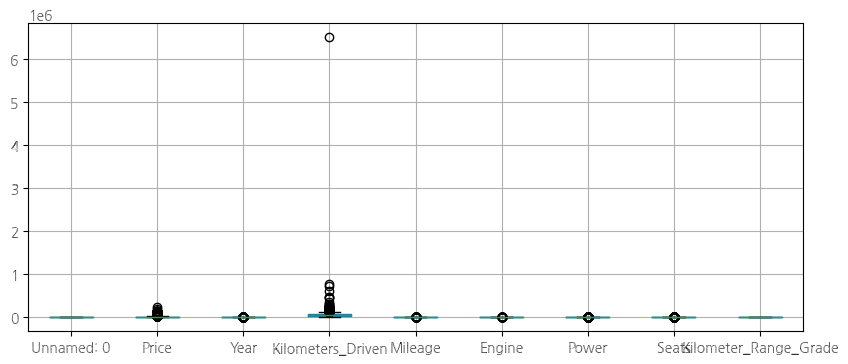

In [66]:
df_raw.boxplot(figsize=(10,4))

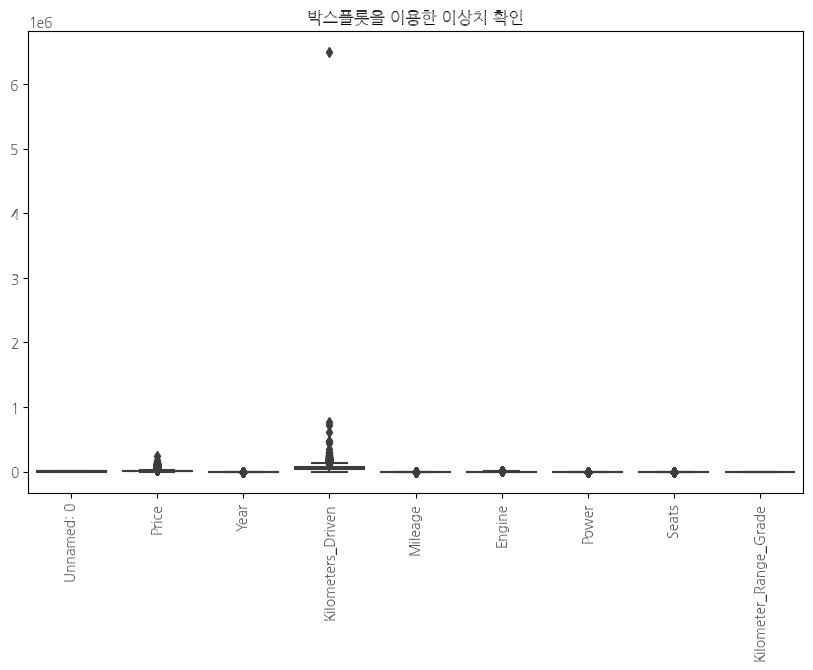

In [69]:
numeric_cols = df_raw.select_dtypes(include=['float64', 'int64']).columns
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_raw[numeric_cols])
plt.title("박스플롯을 이용한 이상치 확인")
plt.xticks(rotation=90)
plt.show()

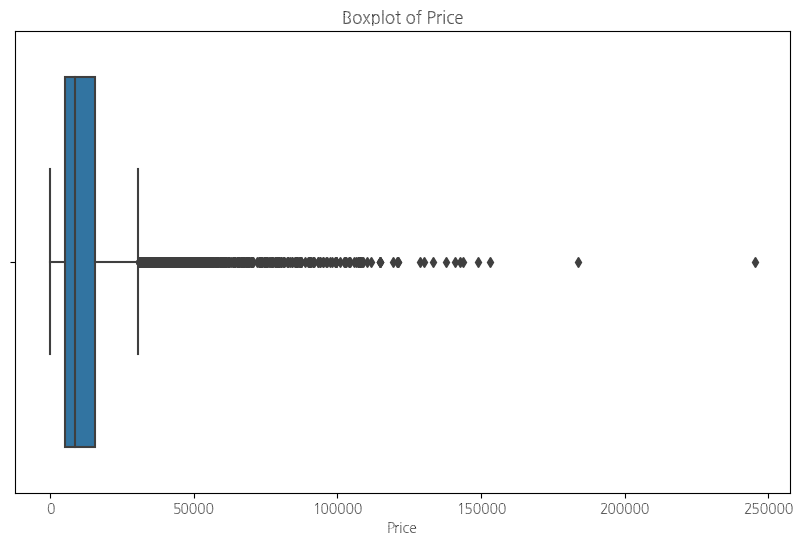

In [71]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_raw['Price'])
plt.title('Boxplot of Price')
plt.xlabel('Price')
plt.show()

In [83]:
new_titanic = df_raw[df_raw["Name"] == "LAND ROVER RANGE ROVER 3.0 DIESEL LWB VOGUE" ]
new_titanic 

,Unnamed: 0,Name,Location,Price,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,BRAND,MODEL,Kilometer_Range_Grade
3175,4079,LAND ROVER RANGE ROVER 3.0 DIESEL LWB VOGUE,Hyderabad,245273.6,2017,25000,Diesel,Automatic,First,13.33,2993.0,255.0,5.0,LAND,ROVER RANGE ROVER 3.0 DIESEL LWB VOGUE,2


In [85]:
new_titanic = df_raw[(df_raw["Price"] >= 150000) & (df_raw["Price"] <= 200000)]
new_titanic


,Unnamed: 0,Name,Location,Price,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,BRAND,MODEL,Kilometer_Range_Grade
3066,5919,JAGUAR F TYPE 5.0 V8 S,Hyderabad,153296.0,2015,8000,Petrol,Automatic,First,12.5,5000.0,488.1,2.0,JAGUAR,F TYPE 5.0 V8 S,1
3132,5781,LAMBORGHINI GALLARDO COUPE,Delhi,183955.2,2011,6500,Petrol,Automatic,Third,6.4,5204.0,560.0,2.0,LAMBORGHINI,GALLARDO COUPE,1


가격의 이상치는 모델과 브랜마다 다르므로 현재 중고차 가격과 튀는 값이 동일하므로 가격에는 이상치가 없다고 판단

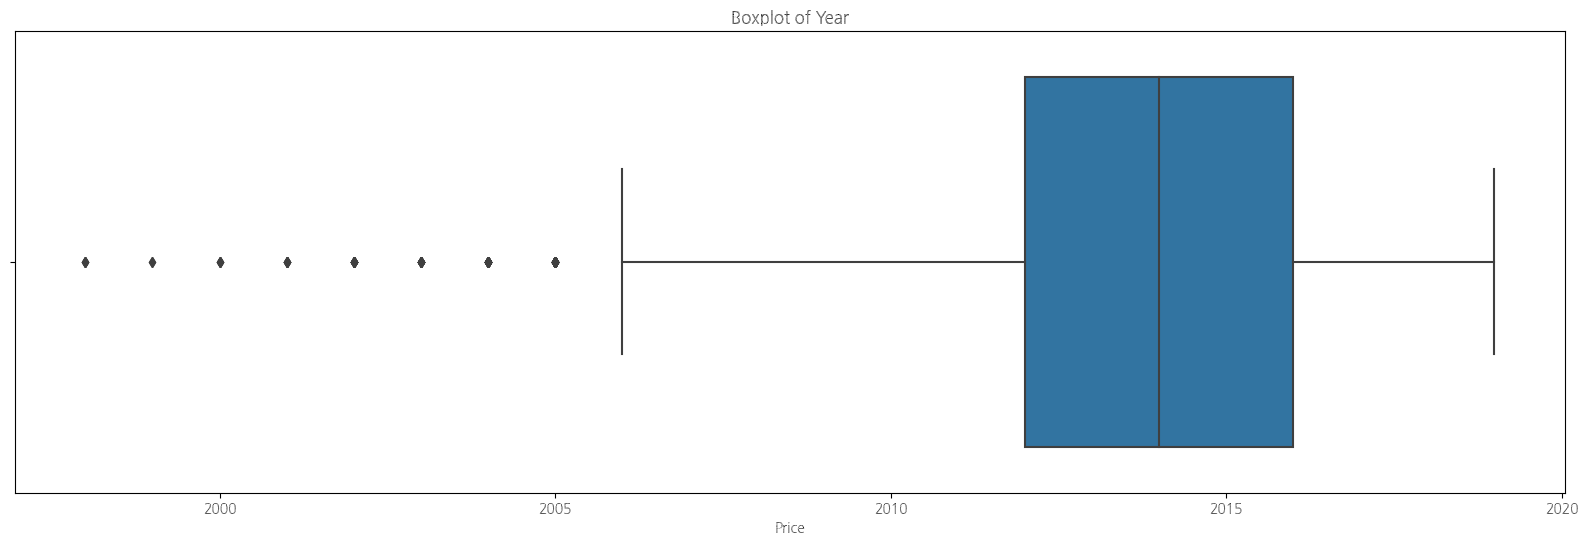

In [90]:
plt.figure(figsize=(20, 6))
sns.boxplot(x=df_raw['Year'])
plt.title('Boxplot of Year')
plt.xlabel('Price')
plt.show()

In [109]:
new_titanic = df_raw['Year'].value_counts()
new_titanic

2014    892
2015    871
2016    845
2013    749
2017    683
2012    649
2011    543
2010    381
2018    357
2009    228
2008    190
2007    133
2019    116
2006     77
2005     59
2004     31
2002     15
2003     15
2001      7
2000      4
1998      4
1999      2
Name: Year, dtype: int64

Year도 이상치는 없다.

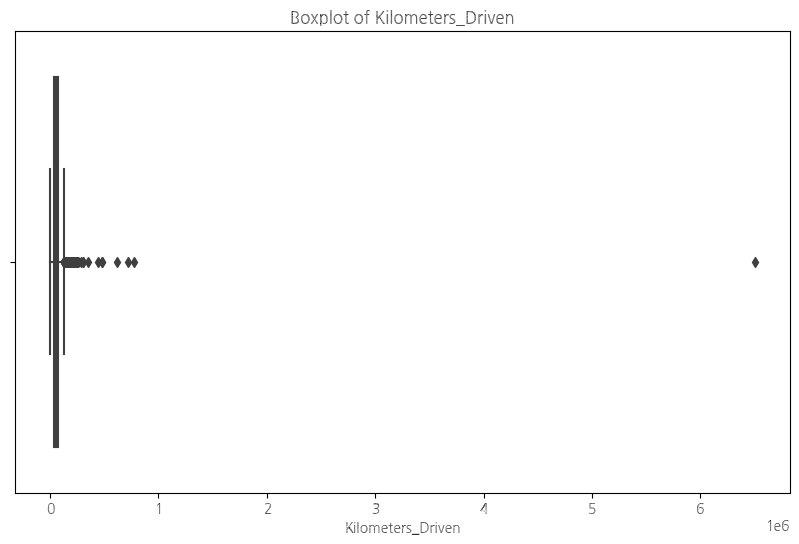

In [110]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_raw['Kilometers_Driven'])
plt.title('Boxplot of Kilometers_Driven')
plt.xlabel('Kilometers_Driven')
plt.show()

In [127]:
new_titanic = df_raw[(df_raw["Kilometers_Driven"] >= 6000000)]
new_titanic

,Unnamed: 0,Name,Location,Price,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,BRAND,MODEL,Kilometer_Range_Grade
557,2328,BMW X5 XDRIVE 30D M SPORT,Chennai,99642.4,2017,6500000,Diesel,Automatic,First,15.97,2993.0,258.0,5.0,BMW,X5 XDRIVE 30D M SPORT,6


In [115]:
test = df_raw[df_raw["Name"]=='BMW X5 XDRIVE 30D M SPORT']
test

,Unnamed: 0,Name,Location,Price,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,BRAND,MODEL,Kilometer_Range_Grade
556,4101,BMW X5 XDRIVE 30D M SPORT,Chennai,87378.72,2016,45000,Diesel,Automatic,First,15.97,2993.0,258.0,5.0,BMW,X5 XDRIVE 30D M SPORT,3
557,2328,BMW X5 XDRIVE 30D M SPORT,Chennai,99642.40,2017,6500000,Diesel,Automatic,First,15.97,2993.0,258.0,5.0,BMW,X5 XDRIVE 30D M SPORT,6
558,5740,BMW X5 XDRIVE 30D M SPORT,Chennai,84312.80,2017,21000,Diesel,Automatic,Second,15.97,2993.0,258.0,5.0,BMW,X5 XDRIVE 30D M SPORT,2


In [117]:
df_raw = df_raw[df_raw['Price'] != 6500000]


,Unnamed: 0,Name,Location,Price,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,BRAND,MODEL,Kilometer_Range_Grade
0,1221,AMBASSADOR CLASSIC NOVA DIESEL,Chennai,2069.50,2003,80000,Diesel,Manual,Third,12.80,1489.0,35.5,5.0,AMBASSADOR,CLASSIC NOVA DIESEL,4
1,398,AUDI A3 35 TDI ATTRACTION,Chennai,25293.84,2014,79271,Diesel,Automatic,First,20.38,1968.0,143.0,5.0,AUDI,A3 35 TDI ATTRACTION,4
2,4782,AUDI A3 35 TDI PREMIUM,Mumbai,29509.48,2016,20003,Diesel,Automatic,First,20.38,1968.0,143.0,5.0,AUDI,A3 35 TDI PREMIUM,2
3,4989,AUDI A3 35 TDI PREMIUM PLUS,Mumbai,28972.94,2016,39000,Diesel,Automatic,First,20.38,1968.0,143.0,5.0,AUDI,A3 35 TDI PREMIUM PLUS,2
4,1954,AUDI A3 35 TDI TECHNOLOGY,Delhi,34491.60,2017,22000,Diesel,Automatic,Second,20.38,1968.0,143.0,5.0,AUDI,A3 35 TDI TECHNOLOGY,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6846,3933,VOLVO XC60 D5,Hyderabad,49821.20,2015,100000,Diesel,Automatic,First,13.50,2400.0,215.0,5.0,VOLVO,XC60 D5,5
6847,989,VOLVO XC60 D5,Pune,21154.85,2011,106976,Diesel,Automatic,First,13.50,2400.0,215.0,5.0,VOLVO,XC60 D5,6
6848,1178,VOLVO XC60 D5 INSCRIPTION,Kochi,26336.25,2014,86925,Diesel,Automatic,First,11.20,2400.0,215.0,5.0,VOLVO,XC60 D5 INSCRIPTION,5
6849,4497,VOLVO XC90 2007-2015 D5 AT AWD,Kochi,36147.20,2014,102001,Diesel,Automatic,First,11.10,2400.0,200.0,7.0,VOLVO,XC90 2007-2015 D5 AT AWD,6


In [125]:
df_raw = df_raw.reset_index(drop=True)

In [126]:
df_raw

,Unnamed: 0,Name,Location,Price,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,BRAND,MODEL,Kilometer_Range_Grade
0,1221,AMBASSADOR CLASSIC NOVA DIESEL,Chennai,2069.50,2003,80000,Diesel,Manual,Third,12.80,1489.0,35.5,5.0,AMBASSADOR,CLASSIC NOVA DIESEL,4
1,398,AUDI A3 35 TDI ATTRACTION,Chennai,25293.84,2014,79271,Diesel,Automatic,First,20.38,1968.0,143.0,5.0,AUDI,A3 35 TDI ATTRACTION,4
2,4782,AUDI A3 35 TDI PREMIUM,Mumbai,29509.48,2016,20003,Diesel,Automatic,First,20.38,1968.0,143.0,5.0,AUDI,A3 35 TDI PREMIUM,2
3,4989,AUDI A3 35 TDI PREMIUM PLUS,Mumbai,28972.94,2016,39000,Diesel,Automatic,First,20.38,1968.0,143.0,5.0,AUDI,A3 35 TDI PREMIUM PLUS,2
4,1954,AUDI A3 35 TDI TECHNOLOGY,Delhi,34491.60,2017,22000,Diesel,Automatic,Second,20.38,1968.0,143.0,5.0,AUDI,A3 35 TDI TECHNOLOGY,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6846,3933,VOLVO XC60 D5,Hyderabad,49821.20,2015,100000,Diesel,Automatic,First,13.50,2400.0,215.0,5.0,VOLVO,XC60 D5,5
6847,989,VOLVO XC60 D5,Pune,21154.85,2011,106976,Diesel,Automatic,First,13.50,2400.0,215.0,5.0,VOLVO,XC60 D5,6
6848,1178,VOLVO XC60 D5 INSCRIPTION,Kochi,26336.25,2014,86925,Diesel,Automatic,First,11.20,2400.0,215.0,5.0,VOLVO,XC60 D5 INSCRIPTION,5
6849,4497,VOLVO XC90 2007-2015 D5 AT AWD,Kochi,36147.20,2014,102001,Diesel,Automatic,First,11.10,2400.0,200.0,7.0,VOLVO,XC90 2007-2015 D5 AT AWD,6


In [129]:
df_raw

,Unnamed: 0,Name,Location,Price,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,BRAND,MODEL,Kilometer_Range_Grade
0,1221,AMBASSADOR CLASSIC NOVA DIESEL,Chennai,2069.50,2003,80000,Diesel,Manual,Third,12.80,1489.0,35.5,5.0,AMBASSADOR,CLASSIC NOVA DIESEL,4
1,398,AUDI A3 35 TDI ATTRACTION,Chennai,25293.84,2014,79271,Diesel,Automatic,First,20.38,1968.0,143.0,5.0,AUDI,A3 35 TDI ATTRACTION,4
2,4782,AUDI A3 35 TDI PREMIUM,Mumbai,29509.48,2016,20003,Diesel,Automatic,First,20.38,1968.0,143.0,5.0,AUDI,A3 35 TDI PREMIUM,2
3,4989,AUDI A3 35 TDI PREMIUM PLUS,Mumbai,28972.94,2016,39000,Diesel,Automatic,First,20.38,1968.0,143.0,5.0,AUDI,A3 35 TDI PREMIUM PLUS,2
4,1954,AUDI A3 35 TDI TECHNOLOGY,Delhi,34491.60,2017,22000,Diesel,Automatic,Second,20.38,1968.0,143.0,5.0,AUDI,A3 35 TDI TECHNOLOGY,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6845,3933,VOLVO XC60 D5,Hyderabad,49821.20,2015,100000,Diesel,Automatic,First,13.50,2400.0,215.0,5.0,VOLVO,XC60 D5,5
6846,989,VOLVO XC60 D5,Pune,21154.85,2011,106976,Diesel,Automatic,First,13.50,2400.0,215.0,5.0,VOLVO,XC60 D5,6
6847,1178,VOLVO XC60 D5 INSCRIPTION,Kochi,26336.25,2014,86925,Diesel,Automatic,First,11.20,2400.0,215.0,5.0,VOLVO,XC60 D5 INSCRIPTION,5
6848,4497,VOLVO XC90 2007-2015 D5 AT AWD,Kochi,36147.20,2014,102001,Diesel,Automatic,First,11.10,2400.0,200.0,7.0,VOLVO,XC90 2007-2015 D5 AT AWD,6


In [128]:
# 인덱스가 2328인 행 삭제
df_raw = df_raw.drop(index=2328)

# 인덱스 재정렬 (선택 사항)
df_raw = df_raw.reset_index(drop=True)


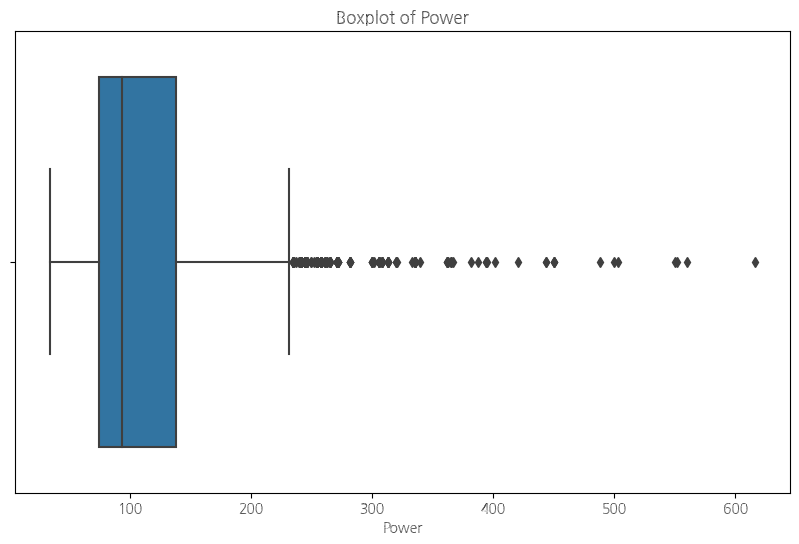

In [130]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_raw['Power'])
plt.title('Boxplot of Power')
plt.xlabel('Power')
plt.show()

In [140]:
new_titanic = df_raw[(df_raw["Name"] =="AMBASSADOR CLASSIC NOVA DIESEL")]
new_titanic

,Unnamed: 0,Name,Location,Price,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,BRAND,MODEL,Kilometer_Range_Grade
0,1221,AMBASSADOR CLASSIC NOVA DIESEL,Chennai,2069.5,2003,80000,Diesel,Manual,Third,12.8,1489.0,35.5,5.0,AMBASSADOR,CLASSIC NOVA DIESEL,4


In [141]:
new_titanic = df_raw['Power'].value_counts()
new_titanic

74.00     274
98.60     151
73.90     147
140.00    142
88.50     129
         ... 
560.00      1
74.96       1
74.93       1
95.00       1
35.50       1
Name: Power, Length: 374, dtype: int64

Power의 이상치로 판단되는 값들을 출력하여 확인한 결과, 실제 모델들의 Power와 동일한 것을 확인할 수 있었다. 즉 Power는 이상치가 없다고 판단 된다. 